In [66]:
import os
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import earthpy as et
import earthpy.plot as ep
import colormap

In [78]:
os.chdir('F:\\GEOG458\\Geog458_final\\LC08_L1TP_041036_20181018_20181031_01_T1\\')

In [147]:
## background information about the Lidar image
with rasterio.open('LC08_L1TP_041036_20181018_20181031_01_T1_B1.TIF') as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7761, 'height': 7891, 'count': 1, 'crs': CRS.from_dict(init='epsg:32611'), 'transform': Affine(30.0, 0.0, 263385.0,
       0.0, -30.0, 3948615.0), 'tiled': False, 'interleave': 'band'}


Text(0, 0.5, 'Row #')

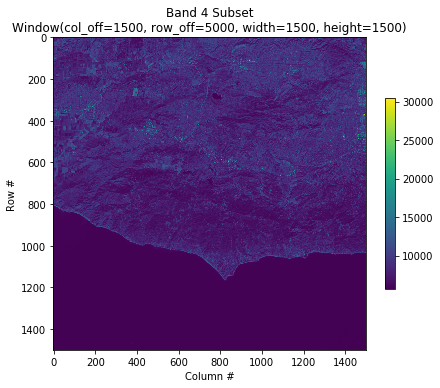

In [86]:
## Create a subset of the full resolution Landsat8 image 
##window = rasterio.windows.Window(1000, 4000, 2500, 2500)
window = rasterio.windows.Window(1500, 5000, 1500, 1500)

with rasterio.open('LC08_L1TP_041036_20181018_20181031_01_T1_B4.TIF') as src:
    subset = src.read(1, window=window)

plt.figure(figsize=(7,7))
plt.imshow(subset)
plt.colorbar(shrink=0.5)
plt.title(f'Band 4 Subset\n{window}')
plt.xlabel('Column #')
plt.ylabel('Row #')


In [175]:
### !!! in order to project RGB and False color image easily, I'm going to create a list to store the image name

## change directory to where the data is stored -> print out what are in there 
## !cd F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1/
## !dir 

In [4]:
## filter all files end with .tif and store them 
LS8_Bands = glob.glob("F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1/*.tif")
LS8_Bands

['F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B1.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B2.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B3.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B4.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B5.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B6.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B7.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_20181018_20181031_01_T1\\LC08_L1TP_041036_20181018_20181031_01_T1_B8.TIF',
 'F:/GEOG458/Geog458_final/LC08_L1TP_041036_2018

Text(0.5, 1.0, 'Band4')

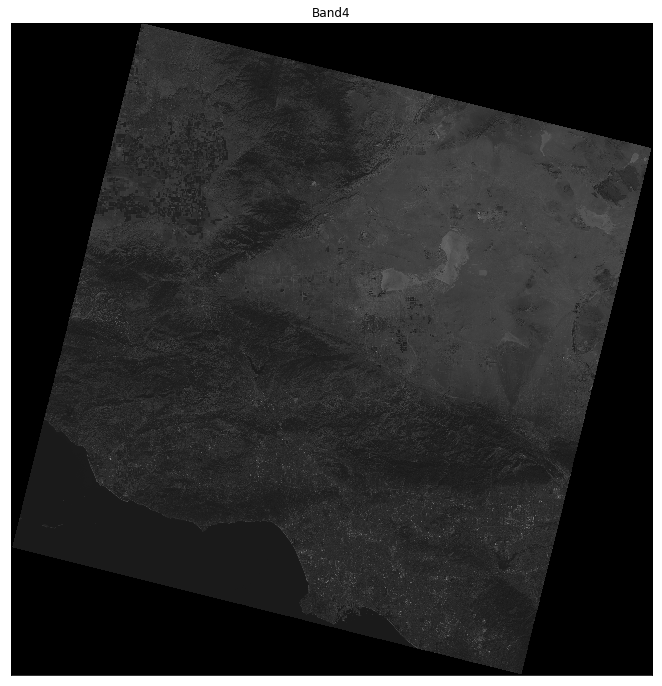

In [5]:
## Open Band 4 by using earthpy
with rasterio.open(LS8_Bands[3]) as src1:
    Landsat8_band4 = src1.read()
ep.plot_bands(Landsat8_band4[0],title = None ,cmap = "Greys_r")
plt.title("Woosley Pre Fire series, Landsat8 Band4")


In [6]:
landsat_path = "C:/Users/LXB19/Documents/GEOG458/Group6_Final/prefire_output/LS08_PreFire.tif"
##land_stack, land_meta = earthpy.spatial.stack(LS8_Bands, out_path= landsat_path)

(<Figure size 864x864 with 12 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002040328C128>,
       dtype=object))

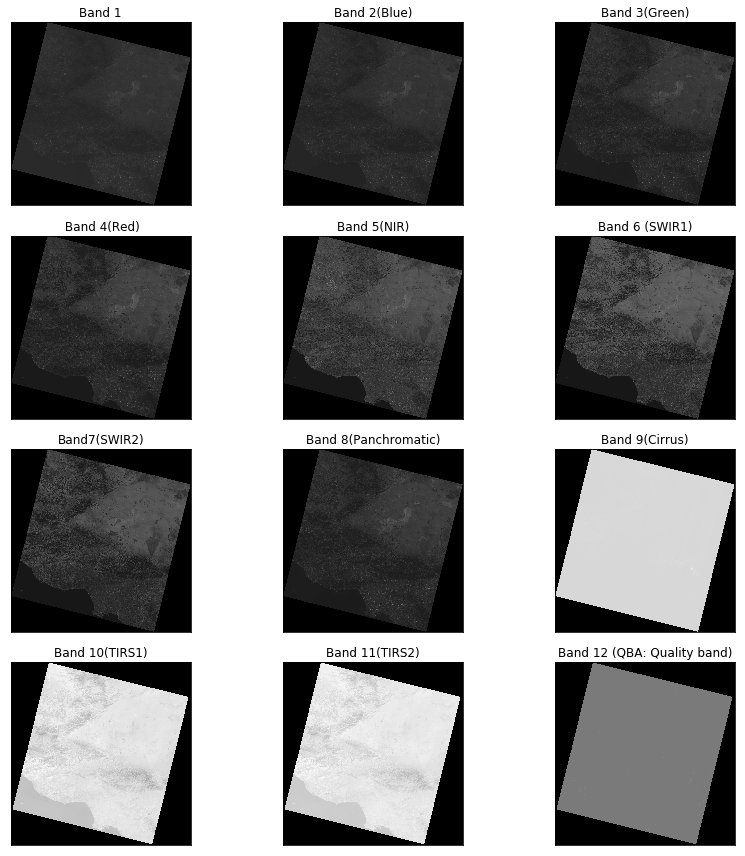

In [7]:
with rasterio.open(landsat_path) as src:
    landsat_prefire = src.read()
    
band_titles = ["Band 1", "Band 2(Blue)", "Band 3(Green)", " Band 4(Red)", "Band 5(NIR)",
               "Band 6 (SWIR1)", "Band7(SWIR2)", "Band 8(Panchromatic)", "Band 9(Cirrus)", 
               "Band 10(TIRS1)", "Band 11(TIRS2)", "Band 12 (QBA: Quality band)"]

ep.plot_bands(landsat_prefire, title = band_titles, cmap = "Greys_r")

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x199d12872b0>)

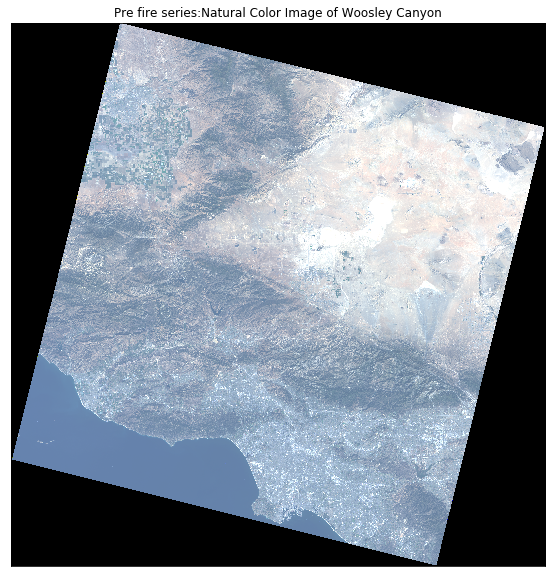

In [239]:
## Plot RGB image 
ep.plot_rgb(landsat_prefire, 
            rgb = [3,2,1],
            title = "Pre fire series:Natural Color Image of Woosley Canyon",
            stretch=True
           )


In [96]:
# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))




Text(0, 0.5, 'Row #')

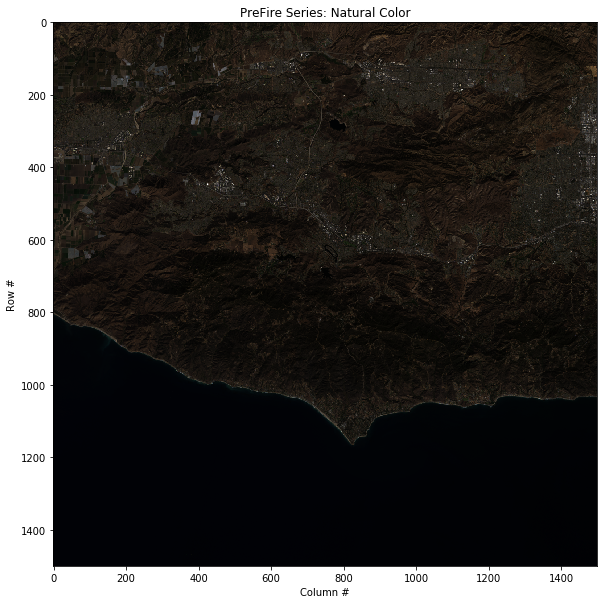

In [108]:
with rasterio.open(LS8_Bands[3]) as src:
    red_band = src.read(1, window=window)

with rasterio.open(LS8_Bands[2]) as src:
    green_band = src.read(1, window=window)

with rasterio.open(LS8_Bands[1]) as src:
    blue_band = src.read(1, window=window)

Nred = normalize(red_band)
Ngreen = normalize(green_band)
Nblue = normalize(blue_band)

rgb = np.dstack((Nred, Ngreen, Nblue))

plt.figure(figsize=(10,10))
plt.imshow(rgb)
plt.title('PreFire Series: Natural Color')
plt.xlabel('Column #')
plt.ylabel('Row #')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x199c957fb38>)

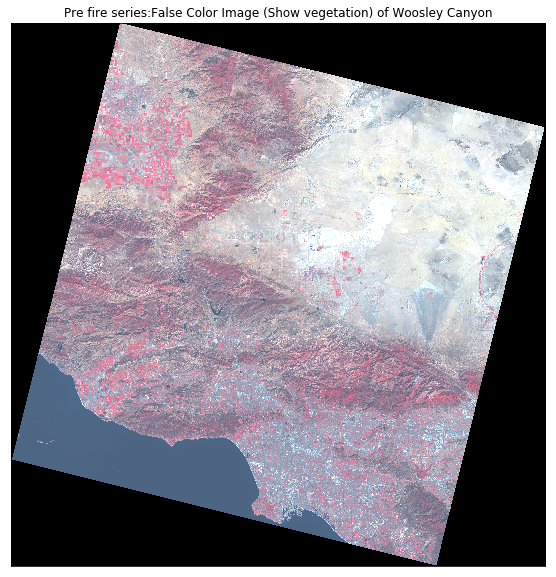

In [242]:
ep.plot_rgb(landsat_prefire, 
            rgb = [4,3,2],
            title = "Pre fire series:False Color Image (Show vegetation) of Woosley Canyon",
            stretch=True
           )

Text(0, 0.5, 'Row #')

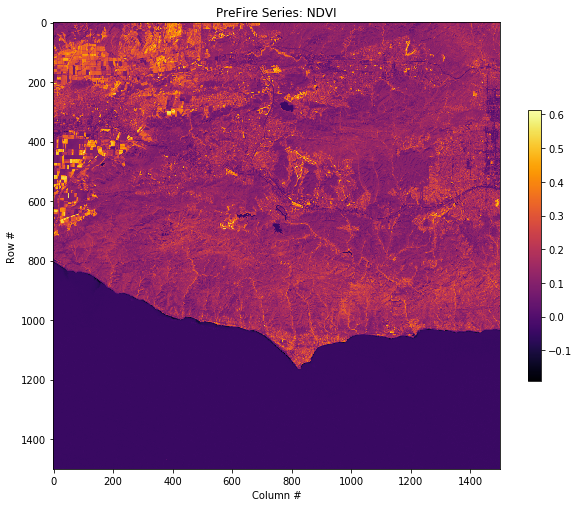

In [87]:
## calculate NDVI 

with rasterio.open(LS8_Bands[3]) as src :
    red = src.read(1, window=window)
    

with rasterio.open(LS8_Bands[4]) as src :
    NIR = src.read(1, window=window)

np.seterr(divide='ignore', invalid='ignore')

ndvi = (NIR.astype(float) - red.astype(float)) / (NIR.astype(float) + red.astype(float))
plt.figure(figsize=(10,10))
plt.imshow(ndvi,cmap='inferno')
plt.colorbar(shrink=0.5)
plt.title('PreFire Series: NDVI')
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

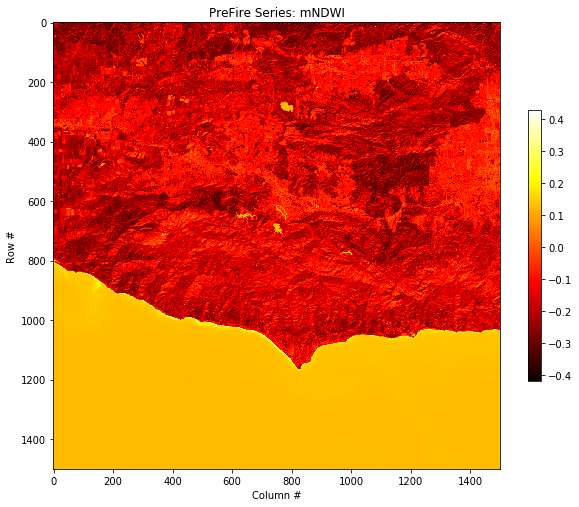

In [88]:
## mNDWI
with rasterio.open(LS8_Bands[2]) as src :
    green = src.read(1, window=window)
    
with rasterio.open(LS8_Bands[5]) as src :
    SWIR = src.read(1, window=window)

np.seterr(divide='ignore', invalid='ignore')

mNDWI = (green.astype(float) - SWIR.astype(float)) / (green.astype(float) + SWIR.astype(float))
plt.figure(figsize=(10,10))
plt.imshow(mNDWI,cmap='hot')
plt.colorbar(shrink=0.5)
plt.title('PreFire Series: mNDWI')
plt.xlabel('Column #')
plt.ylabel('Row #')


Text(0, 0.5, 'Row #')

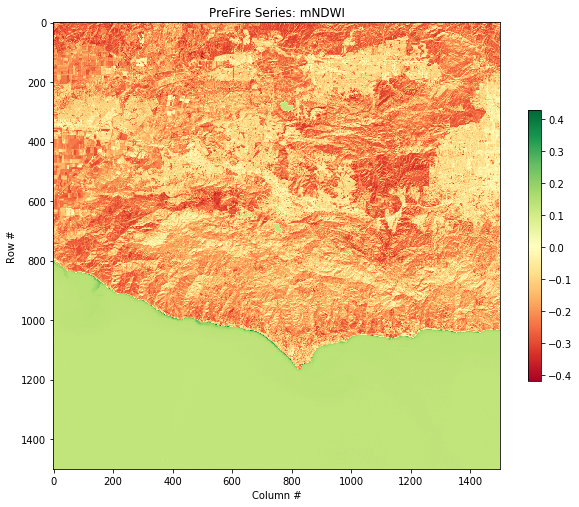

In [89]:
## Pre fire, Normalize Burn Ratio 


from colormap import cmap_builder, test_cmap

with rasterio.open(LS8_Bands[4]) as src :
    NIR = src.read(1, window=window)
    
with rasterio.open(LS8_Bands[5]) as src :
    SWIR = src.read(1, window=window)
    
np.seterr(divide='ignore', invalid='ignore')

pre_fire_NBR = (NIR.astype(float) - SWIR.astype(float)) / (NIR.astype(float) + SWIR.astype(float))

plt.figure(figsize=(10,10))
plt.imshow(mNDWI,cmap='RdYlGn')
plt.colorbar(shrink=0.5)
plt.title('PreFire Series: mNDWI')
plt.xlabel('Column #')
plt.ylabel('Row #')


